### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('/Users/neelbardhan/Desktop/assignment5_1_starter/data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.shape


(12684, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [7]:
for col in data.columns:
    ##print(f"--- {col} ---")
    print(data[col].value_counts(dropna=False))
    print("\n")

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64


temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64


coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


expiration
1d    7091
2h    5593
Name: count, dtype: int64


gender
Female    6511
Male      6173
Name: count, dtype: int64


age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


maritalStatus
Married partner      5100
Single         

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
data = data.drop(columns=['car'])
##given that there are 12576 missing values in car column out of 12684 possible total values - this column probably doesn't help us much.

cols_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[cols_to_fill] = data[cols_to_fill].fillna('Unknown')
##these columns have a few missing values, but not enough to be a problem. I'm filling them with 'Unknown'

data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4~8,1~3,1,1,0,0,1,0


In [9]:
data.isnull().sum()
##check to make sure there are no missing values anymore

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [10]:
total = len(data)
##this is the total number of people in the dataset
counts = data['Y'].value_counts()

used = counts[1] if 1 in counts else 0
not_used = counts[0] if 0 in counts else 0
proportion_used = used / (used + not_used)

print(f"Out of {total} people, {used} accepted the coupon and {not_used} did not. This is a {proportion_used*100}% acceptance rate.")

Out of 12684 people, 7210 accepted the coupon and 5474 did not. This is a 56.84326710816777% acceptance rate.


5. Use a bar plot to visualize the `coupon` column.

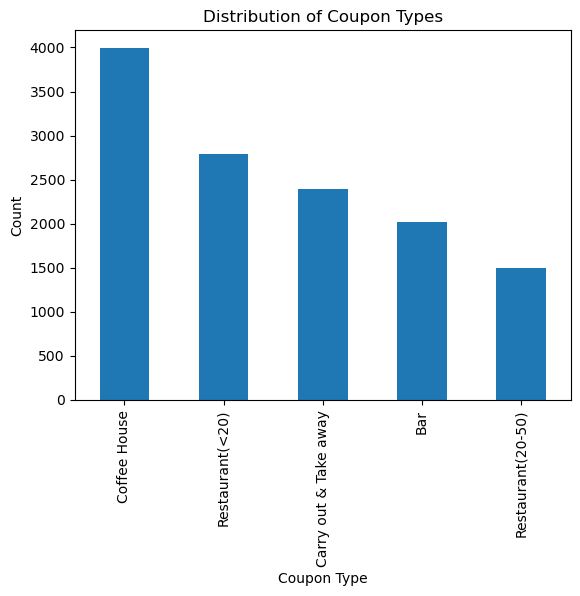

In [11]:
# Count values in the 'coupon' column
coupon_counts = data['coupon'].value_counts()

# Plot
plt.figure()
coupon_counts.plot(kind='bar')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks()
plt.show()

6. Use a histogram to visualize the temperature column.

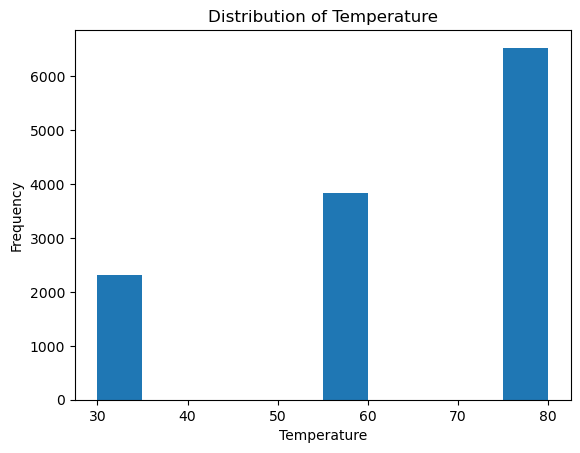

In [12]:
plt.hist(data['temperature'])
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
bar_coupon_df = data[data['coupon'] == 'Bar']
bar_coupon_df.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,Unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [14]:
total = len(bar_coupon_df)
##this is the total number of people in the dataset
bar_counts = bar_coupon_df['Y'].value_counts()
##in column "Y", this tracks an array of Series type - frequency of each response. bar_counts[0] is for unaccepted coupons, bar_counts[1] is for accepted coupons.

# print(bar_counts)
# used_bar = 0
# if 1 in bar_counts:
#     used_bar += 1
    ##bar_counts[1]

used_bar = bar_counts[1] if 1 in bar_counts else 0
not_used_bar = bar_counts[0] if 0 in bar_counts else 0
proportion_used_bar = used_bar / (used_bar + not_used_bar)

print(f"Out of {total} people who were offered bar coupons, {used_bar} accepted the bar coupons and {not_used_bar} did not. This is a {proportion_used_bar*100}% acceptance rate.")

Out of 2017 people who were offered bar coupons, 827 accepted the bar coupons and 1190 did not. This is a 41.00148735746158% acceptance rate.


/var/folders/gn/_y4t4m556xz21tsbhxt3lp300000gn/T/ipykernel_49127/3014663818.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Coupon Outcome', y='Count', data=df_viz, palette=['#4caf50', '#f44336'])


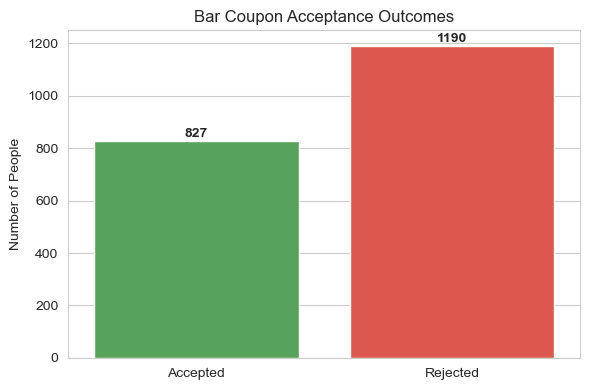

In [36]:
# Data prep
data = {
    'Coupon Outcome': ['Accepted', 'Rejected'],
    'Count': [used_bar, not_used_bar]
}
df_viz = pd.DataFrame(data)

# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Coupon Outcome', y='Count', data=df_viz, palette=['#4caf50', '#f44336'])

# Annotate bars
for i, val in enumerate(df_viz['Count']):
    ax.text(i, val + 5, f'{val}', ha='center', va='bottom', fontweight='bold')

plt.title('Bar Coupon Acceptance Outcomes')
plt.ylabel('Number of People')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [15]:
#this cell is just exploratory and helps explain the logic behind one liner conditionals as seen above

bar_counts_test = bar_coupon_df['Y'].value_counts()
print(bar_counts_test)

if 1 in bar_counts_test:
    used_bar_test = bar_counts_test[1]
else:
    used_bar_test = 0

if 0 in bar_counts_test:
    not_used_bar_test = bar_counts_test[0]
else:
    not_used_bar_test = 0
    
print(used_bar_test)
print(not_used_bar_test)

Y
0    1190
1     827
Name: count, dtype: int64
827
1190


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
print(bar_coupon_df["Bar"].value_counts(dropna=False))

Bar
never      830
less1      570
1~3        397
4~8        150
gt8         49
Unknown     21
Name: count, dtype: int64


In [17]:
# Define clear, known groups. We ignore the unknowns because they're not relevant to our analysis.
bar_3_or_fewer = ['never', 'less1', '1~3']
bar_more_than_3 = ['4~8', 'gt8']

#filter out unknowns from the dataset
bar_known = bar_coupon_df[bar_coupon_df['Bar'] != 'Unknown']

#create two smaller dataframes for the two groups
bar_3_or_fewer_df = bar_known[bar_known['Bar'].isin(bar_3_or_fewer)]
bar_more_than_3_df = bar_known[bar_known['Bar'].isin(bar_more_than_3)]


In [18]:
##bar_3_or_fewer_df.head(20)
##bar_3_or_fewer_df.shape
##bar_more_than_3_df.shape

In [19]:
accepted_3_or_fewer = bar_3_or_fewer_df['Y'].value_counts().get(1, 0)
not_accepted_3_or_fewer = bar_3_or_fewer_df['Y'].value_counts().get(0, 0)
proportion_used_3orless = accepted_3_or_fewer / (accepted_3_or_fewer + not_accepted_3_or_fewer)

print(accepted_3_or_fewer)
print(not_accepted_3_or_fewer)
print(accepted_3_or_fewer + not_accepted_3_or_fewer)

accepted_morethan3 = bar_more_than_3_df['Y'].value_counts().get(1, 0)
not_accepted_morethan3 = bar_more_than_3_df['Y'].value_counts().get(0, 0)
proportion_used_morethan3 = accepted_morethan3 / (accepted_morethan3 + not_accepted_morethan3)

print(accepted_morethan3)
print(not_accepted_morethan3)
print(accepted_morethan3 + not_accepted_morethan3)

666
1131
1797
153
46
199


In [20]:
print(f"Out of {len(bar_3_or_fewer_df)} people who went to a bar 3 or fewer times, {accepted_3_or_fewer} accepted the coupon and {not_accepted_3_or_fewer} did not. This is a {proportion_used_3orless*100}% acceptance rate.")
print(f"Out of {len(bar_more_than_3_df)} people who went to a bar more than 3 times, {accepted_morethan3} accepted the coupon and {not_accepted_morethan3} did not. This is a {proportion_used_morethan3*100}% acceptance rate.")

Out of 1797 people who went to a bar 3 or fewer times, 666 accepted the coupon and 1131 did not. This is a 37.061769616026716% acceptance rate.
Out of 199 people who went to a bar more than 3 times, 153 accepted the coupon and 46 did not. This is a 76.88442211055276% acceptance rate.


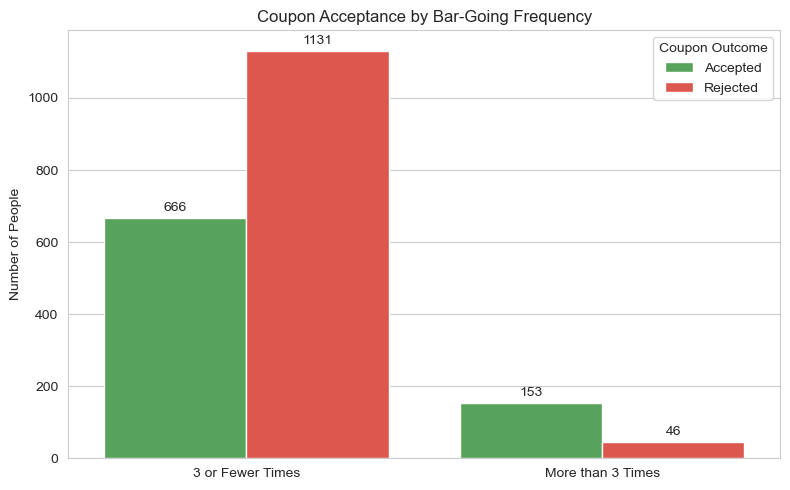

In [37]:
# Data prep
data = {
    'Bar Frequency Group': ['3 or Fewer Times', '3 or Fewer Times', 'More than 3 Times', 'More than 3 Times'],
    'Coupon Outcome': ['Accepted', 'Rejected', 'Accepted', 'Rejected'],
    'Count': [accepted_3_or_fewer, not_accepted_3_or_fewer, accepted_morethan3, not_accepted_morethan3]
}
df_viz = pd.DataFrame(data)

# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Bar Frequency Group', y='Count', hue='Coupon Outcome', data=df_viz,
                 palette={'Accepted': '#4caf50', 'Rejected': '#f44336'})

# Annotate bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

plt.title('Coupon Acceptance by Bar-Going Frequency')
plt.ylabel('Number of People')
plt.xlabel('')
plt.legend(title='Coupon Outcome')
plt.tight_layout()
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [21]:
print(data['age'].unique())
print(data['age'].value_counts())
##this establishes not only what distinct values exist in the Age column, but also how frequent they are. Helps us stratify.

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


In [22]:
def age_mapping(age_str):
    if age_str in ['below21', '21']:
        return 24
    else:
        return 25
#this method helps us separate 25 and overs from those who aren't, in integer format for cleaner processing.

In [23]:
bar_morethan1 = ['1~3', '4~8', 'gt8']
data['age_mapped'] = data['age'].apply(age_mapping)
#age_mapping function then gets applied to the entirety of the Age column in a new column Age_mapped. Helps us below to split the dataframe into two smaller dataframes relevant to our query.

# Group 1: Bar > once a month AND age > 25
group1 = data[(data['Bar'].isin(bar_morethan1)) & (data['age_mapped'] >= 25)]

# Group 2: Everyone else. The ~ indicates NOT in this category.
group2 = data[~((data['Bar'].isin(bar_morethan1)) & (data['age_mapped'] >= 25))]

In [24]:
# Group 1
g1_total = len(group1)
g1_accepted = group1['Y'].value_counts().get(1, 0)
g1_acceptance_rate = g1_accepted / g1_total
print(g1_total)
print(g1_accepted)

# Group 2
g2_total = len(group2)
g2_accepted = group2['Y'].value_counts().get(1, 0)
g2_acceptance_rate = g2_accepted / g2_total
print(g2_total)
print(g2_accepted)

print(g1_total + g2_total) #this verifies the datasets are indeed indexed correctly: as this number should add up to 12684

2777
1726
9907
5484
12684


In [25]:
print(f"Out of {g1_total} people who went to a bar more than 1x a month and are above the age of 25, {g1_accepted} accepted the coupon. This is a {g1_acceptance_rate*100}% acceptance rate.")
print(f"Out of {g2_total} people who fall outside of aforementioned population, {g2_accepted} accepted the coupon. This is a {g2_acceptance_rate*100}% acceptance rate.")

Out of 2777 people who went to a bar more than 1x a month and are above the age of 25, 1726 accepted the coupon. This is a 62.15340295282679% acceptance rate.
Out of 9907 people who fall outside of aforementioned population, 5484 accepted the coupon. This is a 55.35479963662057% acceptance rate.


/var/folders/gn/_y4t4m556xz21tsbhxt3lp300000gn/T/ipykernel_49127/3566947521.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=viz_data, x='Group', y='Acceptance Rate', palette='viridis')


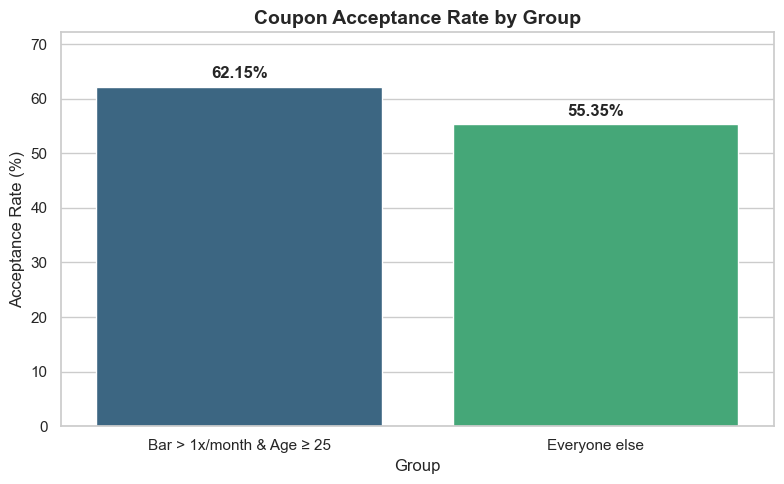

In [38]:
# Data for visualization
viz_data = pd.DataFrame({
    'Group': ['Bar > 1x/month & Age ≥ 25', 'Everyone else'],
    'Acceptance Rate': [g1_acceptance_rate * 100, g2_acceptance_rate * 100]
})

# Set the visual style
sns.set(style="whitegrid")

# Create barplot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=viz_data, x='Group', y='Acceptance Rate', palette='viridis')

# Add text labels on top of bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,
            f"{height:.2f}%", ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and labels
plt.title('Coupon Acceptance Rate by Group', fontsize=14, fontweight='bold')
plt.ylim(0, max(viz_data['Acceptance Rate']) + 10)
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Group')

plt.tight_layout()
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [26]:
bar_morethan1 = ['1~3', '4~8', 'gt8']
excluded_occupations = ['farming', 'fishing', 'forestry']

# Filter for passengers not kids:
# Assuming 'Kid(s)' or similar string for kids - adjust if needed
not_kids = data['passanger'] != 'Kid(s)'

# Filter for occupations NOT in the excluded list
not_farm_fish_forestry = ~data['occupation'].isin(excluded_occupations)

# Combine all filters:
group3 = data[
    (data['Bar'].isin(bar_morethan1)) &
    not_kids &
    not_farm_fish_forestry
]

# everyone else
group4 = data[~(
    (data['Bar'].isin(bar_morethan1)) &
    not_kids &
    not_farm_fish_forestry
)]

In [27]:
# Group 3 acceptance
g3_total = len(group3)
g3_accepted = group1['Y'].value_counts().get(1, 0)
g3_acceptance_rate = g3_accepted / g3_total
print(g3_total)
print(g3_accepted)

# Group 4 acceptance
g4_total = len(group4)
g4_accepted = group4['Y'].value_counts().get(1, 0)
g4_acceptance_rate = g4_accepted / g4_total
print(g4_total)
print(g4_accepted)

print(g3_total+g4_total) #this verifies the datasets are indeed indexed correctly: as this number should add up to 12684

3696
1726
8988
4907
12684


In [28]:
print(f"Out of {g3_total} drivers who went to a bar more than 1x a month, had no kid passengers, and did not work in farming/fishing/forestry, {g3_accepted} accepted the coupon. This is a {g3_acceptance_rate*100}% acceptance rate.")
print(f"Out of {g4_total} drivers who who fall outside of aforementioned population, {g4_accepted} accepted the coupon. This is a {g4_acceptance_rate*100}% acceptance rate.")

Out of 3696 drivers who went to a bar more than 1x a month, had no kid passengers, and did not work in farming/fishing/forestry, 1726 accepted the coupon. This is a 46.6991341991342% acceptance rate.
Out of 8988 drivers who who fall outside of aforementioned population, 4907 accepted the coupon. This is a 54.59501557632399% acceptance rate.


/var/folders/gn/_y4t4m556xz21tsbhxt3lp300000gn/T/ipykernel_49127/2102225410.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=group_labels, y=acceptance_rates, palette=["#2a9d8f", "#e76f51"])


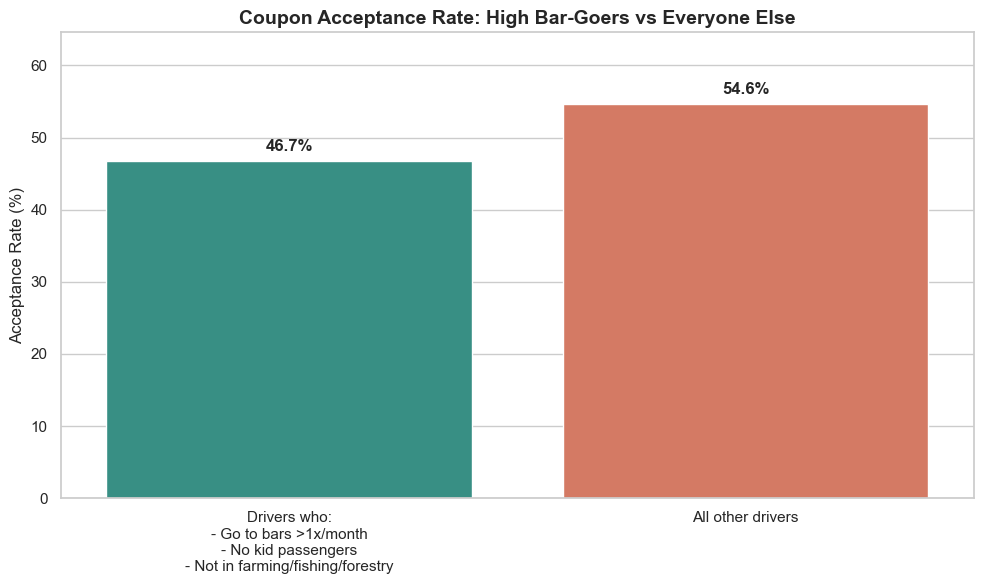

In [39]:
# Set Seaborn style
sns.set(style="whitegrid")

# Data for visualization
group_labels = [
    'Drivers who:\n- Go to bars >1x/month\n- No kid passengers\n- Not in farming/fishing/forestry',
    'All other drivers'
]
acceptance_rates = [g3_acceptance_rate * 100, g4_acceptance_rate * 100]  # in percentages

# Create bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=group_labels, y=acceptance_rates, palette=["#2a9d8f", "#e76f51"])

# Annotate bars with values
for i, val in enumerate(acceptance_rates):
    ax.text(i, val + 1, f"{val:.1f}%", ha='center', va='bottom', fontweight='bold')

# Plot aesthetics
plt.title("Coupon Acceptance Rate: High Bar-Goers vs Everyone Else", fontsize=14, weight='bold')
plt.ylabel("Acceptance Rate (%)")
plt.ylim(0, max(acceptance_rates) + 10)
plt.xticks(rotation=0)

# Save and show
plt.tight_layout()

plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [29]:
def age_mapping_under30(age_str):
    if age_str in ['below21', '21', '26']:
        return 29
    else:
        return 30
#this method helps us separate 30 and overs from those who aren't, in integer format for cleaner processing.

data['age_mapped'] = data['age'].apply(age_mapping_under30)

bar_freq = ['1~3', '4~8', 'gt8']
# STEP 2: Group 5 - Bar goers more than once/month, not kids, not widowed
group5 = (
    (data['Bar'].isin(bar_freq)) &
    (data['passanger'] != 'Kid(s)') &
    (data['maritalStatus'] != 'Widowed')
)

# STEP 3: Group 6 - Bar goers more than once/month AND age under 30
group6 = (
    (data['Bar'].isin(bar_freq)) &
    (data['age_mapped'] < 30)
)


cheap_rest_freq = ['4~8', 'gt8']
low_income = [
    'Less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999'
]

# STEP 4: Group 7 - Cheap restaurants more than 4x/month AND low income
group7 = (
    (data['RestaurantLessThan20'].isin(cheap_rest_freq)) &
    (data['income'].isin(low_income))
)

# STEP 5: Combine groups
group_567_combined = group5 | group6 | group7

# STEP 6: Final splits
combined_567 = data[group_567_combined]
rest_of_drivers = data[~group_567_combined]

print("Group 5 size:", group5.sum())
print("Group 6 size:", group6.sum())
print("Group 7 size:", group7.sum())
print("Combined group size:", combined_567.shape[0])
print("Rest of drivers size:", rest_of_drivers.shape[0])

# Acceptance rate = # of Yes / Total in group

acceptance_rate_567 = combined_567['Y'].value_counts().get(1, 0) / combined_567.shape[0]
acceptance_rate_rest = rest_of_drivers['Y'].value_counts().get(1, 0) / rest_of_drivers.shape[0]

print("\nThe population that's relevant to answering this question is: folks who go to bars more than once a month, had passengers that were not a kid, and were not widowed,\nOR go to bars more than once a month and are under the age of 30,\nOR go to cheap restaurants more than 4 times a month and income is less than 50K.\n")
print(f"Out of {combined_567.shape[0]} drivers who fit the aforementioned criteria as listed in the problem, {combined_567['Y'].value_counts().get(1, 0)} accepted the coupon. This is a {acceptance_rate_567*100}% acceptance rate.")
print(f"Out of {rest_of_drivers.shape[0]} drivers who who fall outside of aforementioned population, {rest_of_drivers['Y'].value_counts().get(1, 0)} accepted the coupon. This is a {acceptance_rate_rest*100}% acceptance rate.")

Group 5 size: 3696
Group 6 size: 2272
Group 7 size: 2279
Combined group size: 5152
Rest of drivers size: 7532

The population that's relevant to answering this question is: folks who go to bars more than once a month, had passengers that were not a kid, and were not widowed,
OR go to bars more than once a month and are under the age of 30,
OR go to cheap restaurants more than 4 times a month and income is less than 50K.

Out of 5152 drivers who fit the aforementioned criteria as listed in the problem, 3119 accepted the coupon. This is a 60.53959627329193% acceptance rate.
Out of 7532 drivers who who fall outside of aforementioned population, 4091 accepted the coupon. This is a 54.31492299522039% acceptance rate.


/var/folders/gn/_y4t4m556xz21tsbhxt3lp300000gn/T/ipykernel_49127/2174365968.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=viz_df, x='Group', y='Acceptance Rate', palette='coolwarm')


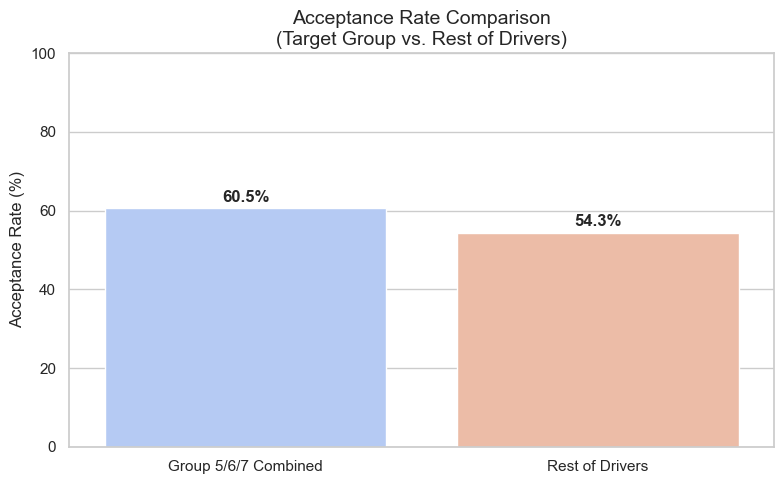

In [40]:
# Data for visualization
viz_df = pd.DataFrame({
    'Group': ['Group 5/6/7 Combined', 'Rest of Drivers'],
    'Acceptance Rate': [acceptance_rate_567 * 100, acceptance_rate_rest * 100]
})

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=viz_df, x='Group', y='Acceptance Rate', palette='coolwarm')

# Annotate bars with percentage values
for i, val in enumerate(viz_df['Acceptance Rate']):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.title('Acceptance Rate Comparison\n(Target Group vs. Rest of Drivers)', fontsize=14)
plt.ylim(0, 100)
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('')
plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [30]:
print("Drivers who accepted the bar coupons tend to be more frequent bar-goers, especially those who visit bars more than once a month.\nThey are more likely to be younger (under 30) and have social situations where they travel without kids as passengers.\nAdditionally, acceptance rates are higher among drivers who visit inexpensive restaurants more than four times a month and have a lower income (under $50K).\nThis suggests that drivers who are more socially active and possibly more budget-conscious are more receptive to bar coupon offers.\nMarital status, specifically not being widowed, also seems to be a factor, indicating that drivers with active social lives may be more likely to accept the coupons.")

print("In summary, drivers who accept bar coupons are likely to be younger, socially engaged, frequently visit bars or affordable restaurants, and may be more financially motivated by discounts or deals.")

Drivers who accepted the bar coupons tend to be more frequent bar-goers, especially those who visit bars more than once a month.
They are more likely to be younger (under 30) and have social situations where they travel without kids as passengers.
Additionally, acceptance rates are higher among drivers who visit inexpensive restaurants more than four times a month and have a lower income (under $50K).
This suggests that drivers who are more socially active and possibly more budget-conscious are more receptive to bar coupon offers.
Marital status, specifically not being widowed, also seems to be a factor, indicating that drivers with active social lives may be more likely to accept the coupons.
In summary, drivers who accept bar coupons are likely to be younger, socially engaged, frequently visit bars or affordable restaurants, and may be more financially motivated by discounts or deals.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [31]:
coffee_df = data[data['coupon'] == 'Coffee House']

# Create a new column for age mapping
coffee_df['age_mappedunder30'] = coffee_df['age'].apply(age_mapping_under30)

# Define population of interest
coffee_lovers = coffee_df[
    (coffee_df['CoffeeHouse'].isin(['4~8', 'gt8'])) &
    (coffee_df['age_mappedunder30'] < 30) &
    (~coffee_df['passanger'].str.contains('Kid', na=False))
]

non_coffee_lovers = coffee_df[~coffee_df.index.isin(coffee_lovers.index)]

/var/folders/gn/_y4t4m556xz21tsbhxt3lp300000gn/T/ipykernel_49127/759795449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_df['age_mappedunder30'] = coffee_df['age'].apply(age_mapping_under30)


In [32]:
total = len(coffee_df)
accepted = len(coffee_df[coffee_df['Y'] == 1])
rejected = len(coffee_df[coffee_df['Y'] == 0])
acceptance_rate = accepted / total * 100
print(f"Total passengers offered Coffee House coupons: {total}")
print(f"accepted by {accepted} people")
print(f"rejected by {rejected} people")
print(f"acceptance rate {acceptance_rate}%")

Total passengers offered Coffee House coupons: 3996
accepted by 1995 people
rejected by 2001 people
acceptance rate 49.92492492492492%


In [33]:
# Stats for population of interest
coffee_lovers_total = len(coffee_lovers)
coffee_lovers_accept = len(coffee_lovers[coffee_lovers['Y'] == 1])
coffee_lovers_rate = coffee_lovers_accept / coffee_lovers_total * 100 if coffee_lovers_total > 0 else 0

print("\nAmong young frequent coffee drinkers (under 30, no kids, visits 4+ times/month):")
print(f"→ Total: {coffee_lovers_total}")
print(f"→ Accepted the coupon: {coffee_lovers_accept} ({coffee_lovers_rate}% acceptance rate)")


Among young frequent coffee drinkers (under 30, no kids, visits 4+ times/month):
→ Total: 410
→ Accepted the coupon: 282 (68.78048780487805% acceptance rate)


In [34]:
# Stats for non-target group
non_coffee_lovers_total = len(non_coffee_lovers)
non_coffee_lovers_accept = len(non_coffee_lovers[non_coffee_lovers['Y'] == 1])
non_coffee_lovers_rate = non_coffee_lovers_accept / non_coffee_lovers_total * 100 if non_coffee_lovers_total > 0 else 0

print("\nAmong everyone else:")
print(f"→ Total: {non_coffee_lovers_total}")
print(f"→ Accepted the coupon: {non_coffee_lovers_accept} ({non_coffee_lovers_rate}% acceptance rate)")


Among everyone else:
→ Total: 3586
→ Accepted the coupon: 1713 (47.76910206358059% acceptance rate)


In [35]:
print(
    "Summary:\n"
    "Out of 3,996 passengers offered Coffee House coupons, about half (49.9%) accepted the offer.\n\n"
    "Among young, frequent coffee drinkers under 30 years old with no kids who visit coffee shops 4 or more times per month, "
    "the acceptance rate was much higher at 68.78%.\n\n"
    "In contrast, everyone else had a significantly lower acceptance rate of 47.769%.\n\n"
    "This suggests that younger frequent coffee drinkers without children are substantially more likely to accept Coffee House coupons "
    "compared to the general population."
)

Summary:
Out of 3,996 passengers offered Coffee House coupons, about half (49.9%) accepted the offer.

Among young, frequent coffee drinkers under 30 years old with no kids who visit coffee shops 4 or more times per month, the acceptance rate was much higher at 68.78%.

In contrast, everyone else had a significantly lower acceptance rate of 47.769%.

This suggests that younger frequent coffee drinkers without children are substantially more likely to accept Coffee House coupons compared to the general population.
